## FUZZY C MEAN IMPLEMENTATION FROM SCRATCH 
iris DataSet for clustring and testing to see the how the culstring done correctly 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load Data 

In [3]:
def initialize_membership_matrix(n, c):
    member_mat = np.random.rand(n, c)
    member_mat /= member_mat.sum(axis=1, keepdims=True)
    return member_mat.tolist()


m = initialize_membership_matrix(10,3);
print(m)

[[0.48566082027486956, 0.26222299658060105, 0.2521161831445294], [0.462136772977503, 0.5122252082312855, 0.025638018791211577], [0.3194143800637371, 0.04396544071315729, 0.6366201792231057], [0.3447501364452393, 0.40734838824879177, 0.24790147530596895], [0.1962172103013312, 0.45367221875976504, 0.3501105709389038], [0.11582968868615907, 0.5412772231103347, 0.3428930882035062], [0.0314093562133878, 0.3087522256174801, 0.659838418169132], [0.1893138577658422, 0.4523053546513985, 0.35838078758275943], [0.29534789951248347, 0.09666365892352481, 0.6079884415639918], [0.4998088957924475, 0.20157210171336581, 0.29861900249418666]]


In [4]:
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
X = df.iloc[:, [0, 1, 2, 3]].values
X=X.astype(float)
X=np.array(X)

## PCA IMPLEMENTATION FROM SCRATCH

In [6]:
def _PCA(X):
   
    # 1. Standardize data by subtracting mean and dividing by standard deviation
    mean_values = X.mean(axis=0)
    std_values = X.std(axis=0)
    X_standardized = (X - mean_values) / std_values

    # 2. Covariance matrix From Scratch
    cov = np.dot(X_standardized.T, X_standardized) / (X_standardized.shape[0])  # (n_features, n_features)

    # 3. Eigen decomposition
    eigen_values, eigen_vectors = np.linalg.eig(cov)

    # 4. Sort eigen values in descending order
    idx = eigen_values.argsort()[::-1]
    eigen_values = eigen_values[idx]
    eigen_vectors = eigen_vectors[:, idx]

    # 5. Q matrix
    Q = eigen_vectors

    return Q,std_values,mean_values


In [7]:
X_standardized = (X - X.mean(axis=0)) / X.std(axis=0)

In [8]:
def loss (X, X_reconstructed):
    return np.mean((X - X_reconstructed)**2)

In [9]:
lossList=[]
Q,std_values,mean_values=_PCA(X)
for _ in range(1,X.shape[1]+1):
    X_projected = np.dot(X_standardized ,Q[:,:_])
    X_reconstructed = np.dot(X_projected ,Q[:,:_].T)*std_values  + mean_values
    lossList.append(loss(X, X_reconstructed))
    print(f'loss for {_} components is {lossList[_-1].round(2)}')

loss for 1 components is 0.1
loss for 2 components is 0.04
loss for 3 components is 0.01
loss for 4 components is 0.0


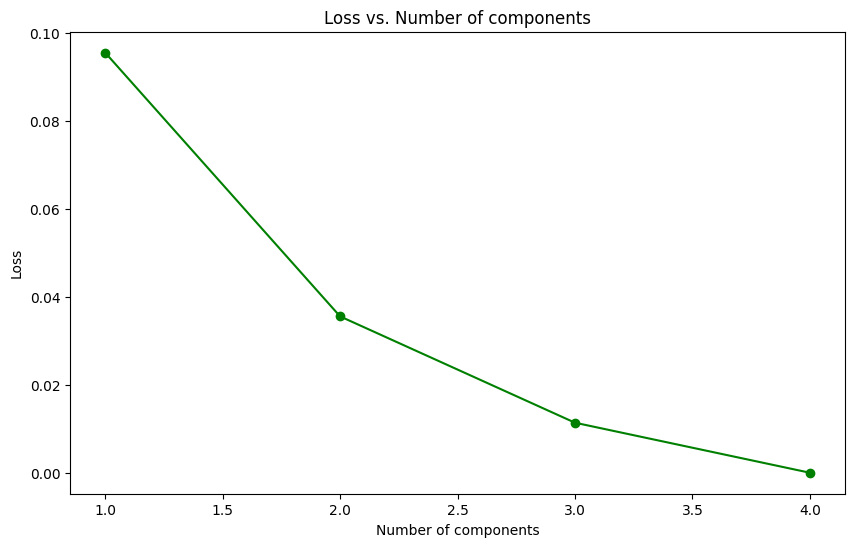

In [10]:
# Plotting the Loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, X.shape[1]+1), lossList, marker='o', color='green')
plt.xlabel('Number of components')
plt.ylabel('Loss')
plt.title('Loss vs. Number of components')
plt.show()

## We see that the first two principal components loss is totaly fine and we can use them for our calusttering 

In [11]:
X_pca = np.dot(X_standardized ,Q[:,:2]) # 2 components only

/tmp/ipykernel_40888/3201026772.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pca[:, 0], X_pca[:, 1], c="green", cmap='viridis')


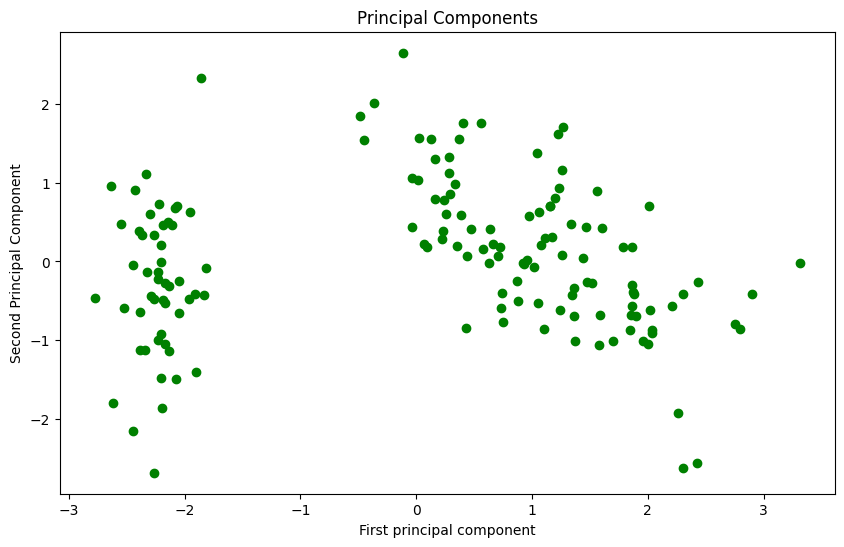

In [12]:
# Plotting the X_pca 
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c="green", cmap='viridis')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.title('Principal Components')
plt.show()

In [13]:
# utility values
data=X_pca
g=2
n=len(data)
c=3
p=len(data[0])
max_iter=100

In [14]:
def euclidean_distance(point1,point2):
    dis=0
    for i in range(len(point1)):
        dis+=(point1[i]-point2[i])**2
    return dis**0.5

### Fuzzy C Means Clustering Algorithm Implementation

In [15]:
import random
import math

def initialize_membership_matrix(n, c):
    member_mat = np.random.rand(n, c)
    member_mat /= member_mat.sum(axis=1, keepdims=True)
    return member_mat.tolist()

def update_centroid(member_mat):
    member_mat_g = np.power(member_mat, g)
    centroids = {}
    for j in range(c):
        add = np.sum(member_mat_g[:, j])
        x = np.dot(member_mat_g[:, j], data)
        val = x / add
        centroids[j] = val.tolist()
    return centroids


def update_membership_matrix(member_mat,centroids):
    ratio=float(2/(g-1))
    for i in range(n):
        distances=list()
        for j in range(c):
            distances.append(euclidean_distance(data[i],centroids[j]))
        for j in range(c):
            den = sum([math.pow(float(distances[j]/distances[q]), ratio) for q in range(c)])
            member_mat[i][j] = float(1/den) 
    return member_mat
                        
    
def find_cluster(member_mat):
    clusters=list()
    for i in range(n):
        max_val, idx = max((val, idx) for (idx, val) in enumerate(member_mat[i]))
        clusters.append(idx)
    return clusters

def check(old_member_mat,member_mat):
    diff=0
    for i in range(n):
        for j in range(c):
            diff+=old_member_mat[i][j]-member_mat[i][j]
    if(diff<0.01):
        return True
    return False

def fuzzy_c_mean():
    member_mat=initialize_membership_matrix(n,c)
    for i in range(max_iter):
        centroids=update_centroid(member_mat)
        old_member_mat=member_mat
        member_mat=update_membership_matrix(member_mat,centroids)
        cluster=find_cluster(member_mat)
        if(check(old_member_mat,member_mat))<0.001:
            print(i)
            break
    
    
    return cluster,centroids


In [16]:
fuzyy_cluster,centroids=fuzzy_c_mean()
print(centroids)

{0: [-2.203989927866429, -0.2918598865172669], 1: [0.5196460690222015, 0.7724773273359966], 2: [1.7154654101942952, -0.5684038690478143]}


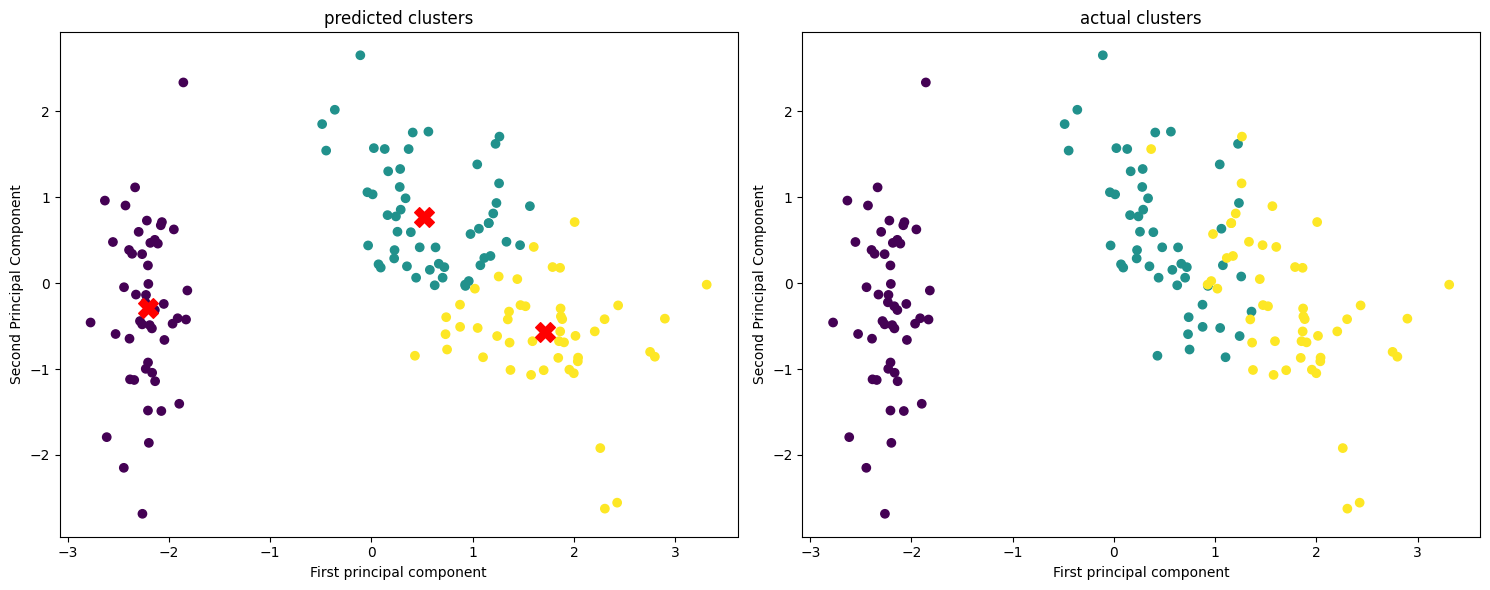

In [17]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=fuzyy_cluster, cmap='viridis')
plt.scatter(np.array(list(centroids.values()))[:,0], np.array(list(centroids.values()))[:,1], marker='X', s=200, c='red')

plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.title('predicted clusters')

# Plotting the second subplot
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=iris.target, cmap='viridis')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.title('actual clusters')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [18]:
# update the original data with the cluster number
df['cluster'] = fuzyy_cluster
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [19]:
target = iris.target
# compare the original target and the cluster number
num_correct = 0
misclassified = []
for i in range(n):
    if target[i] == df['cluster'][i]:
        num_correct += 1
    else:
        misclassified.append(i)
accWithPca=(num_correct/n)*100       
print("Accuracy: ", accWithPca)

Accuracy:  83.33333333333334


In [20]:
misclassified=np.array(misclassified)
print("Misclassified data points: ", misclassified,"len: ",len(misclassified),"Out of ",n,"Data Points ")

Misclassified data points:  [ 50  51  52  56  65  70  75  76  77  85  86 101 106 113 114 119 121 123
 126 133 134 138 142 146 149] len:  25 Out of  150 Data Points 


/tmp/ipykernel_40888/1715482726.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pca[misclassified, 0], X_pca[misclassified, 1], c='red', cmap='viridis')


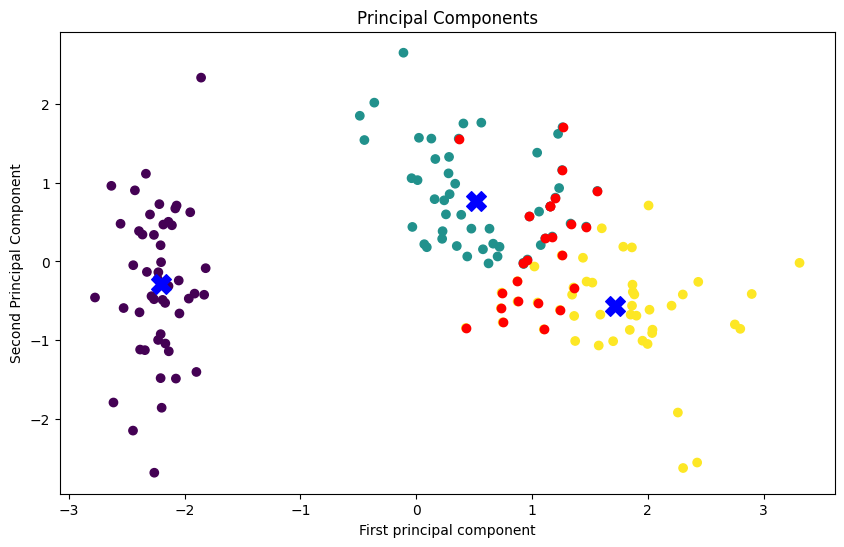

In [21]:
# Plotting the misclassified data points as red points
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=fuzyy_cluster, cmap='viridis')
plt.scatter(X_pca[misclassified, 0], X_pca[misclassified, 1], c='red', cmap='viridis')
plt.scatter(np.array(list(centroids.values()))[:,0], np.array(list(centroids.values()))[:,1], marker='X', s=200, c='blue')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.title('Principal Components')
plt.show()


## Without PCA

In [22]:
# utility values
data=X
g=2
n=len(data)
c=3
p=len(data[0])
max_iter=100

In [23]:
fuzyy_cluster,centroids=fuzzy_c_mean()
print(centroids)

{0: [6.775011223752626, 3.0523822710435553, 5.646781781918659, 2.0535466585408644], 1: [5.0039659606112545, 3.414088858778307, 1.4828155326056132, 0.2535463174787418], 2: [5.888932360609779, 2.761069363204441, 4.36395164313304, 1.3973150407078863]}


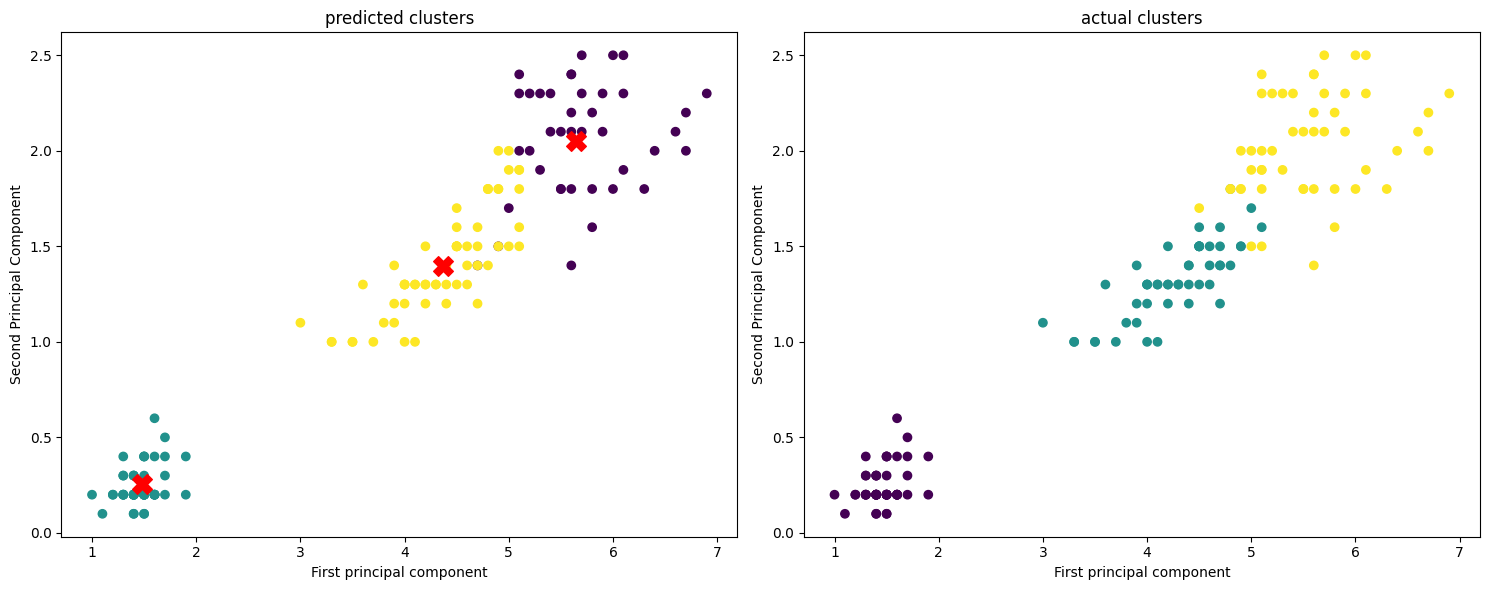

In [24]:
# Plotting the dimension 2 and 3 of the data points

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 2], X[:, 3], c=fuzyy_cluster, cmap='viridis')
plt.scatter(np.array(list(centroids.values()))[:,2], np.array(list(centroids.values()))[:,3], marker='X', s=200, c='red')

plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.title('predicted clusters')

# Plotting the second subplot
plt.subplot(1, 2, 2)
plt.scatter(X[:, 2], X[:, 3], c=iris.target, cmap='viridis')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.title('actual clusters')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [25]:
# update the original data with the cluster number
df['cluster'] = fuzyy_cluster
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


In [26]:
target = iris.target
# compare the original target and the cluster number
num_correct = 0
misclassified = []
for i in range(n):
    if target[i] == df['cluster'][i]:
        num_correct += 1
    else:
        misclassified.append(i)
accWithoutPca=(num_correct/n)*100       
print("Accuracy: ", accWithoutPca)

Accuracy:  8.666666666666668


In [27]:
misclassified=np.array(misclassified)
print("Misclassified data points: ", misclassified,"len: ",len(misclassified),"Out of ",n,"Data Points ")

Misclassified data points:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 102 103 104 105 107 108 109
 110 111 112 114 115 116 117 118 120 122 124 125 128 129 130 131 132 134
 135 136 137 139 140 141 143 144 145 147 148] len:  137 Out of  150 Data Points 


/tmp/ipykernel_40888/1853003392.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[misclassified, 2], X[misclassified, 3], c='red', cmap='viridis')


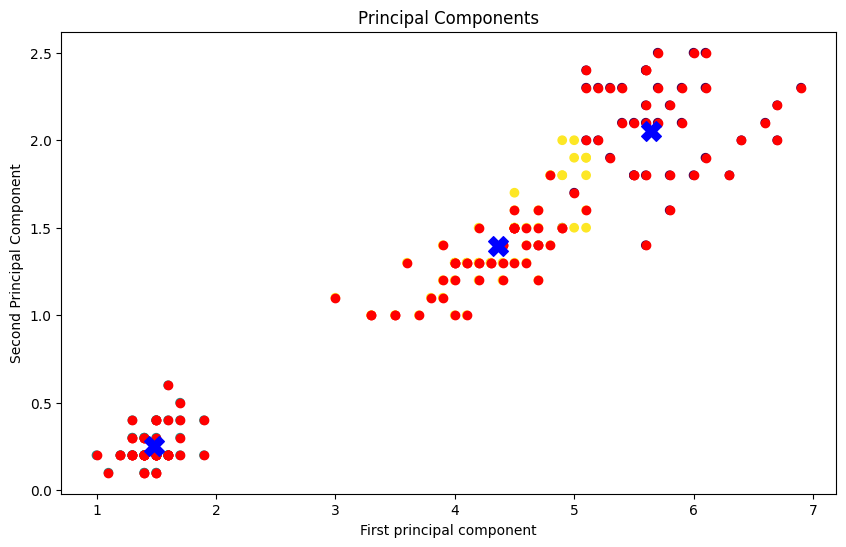

In [28]:
# Plotting the misclassified data points as red points
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 2], X[:, 3], c=fuzyy_cluster, cmap='viridis')
plt.scatter(X[misclassified, 2], X[misclassified, 3], c='red', cmap='viridis')
plt.scatter(np.array(list(centroids.values()))[:,2], np.array(list(centroids.values()))[:,3], marker='X', s=200, c='blue')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.title('Principal Components')
plt.show()

Accuracy with PCA:  83.33333333333334
Accuracy without PCA:  8.666666666666668


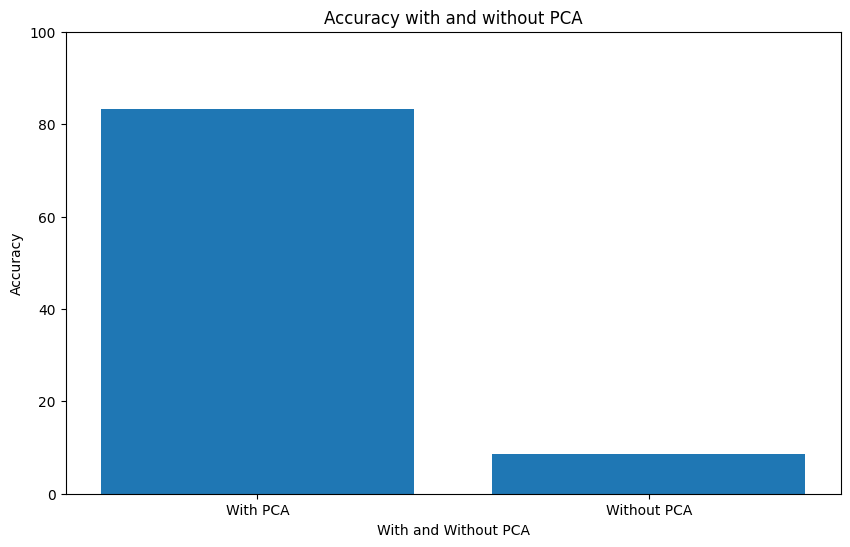

In [36]:
# Comparing the accuracy with and without PCA
print("Accuracy with PCA: ",accWithPca)
print("Accuracy without PCA: ",accWithoutPca)

# Plotting the accuracy with and without PCA
plt.figure(figsize=(10, 6))
plt.bar(["With PCA","Without PCA"],[accWithPca,accWithoutPca])
plt.xlabel('With and Without PCA')
plt.ylabel('Accuracy')
plt.title('Accuracy with and without PCA')
plt.ylim(0,100)
plt.show()